In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from useful.eda import basic_info
%matplotlib inline

Now it's time for another guided example. This time we're going to look at recipes. Specifically we'll use the epicurious dataset, which has a collection of recipes, key terms and ingredients, and their ratings.

What we want to see is if we can use the ingredient and keyword list to predict the rating. For someone writing a cookbook this could be really useful information that could help them choose which recipes to include because they're more likely to be enjoyed and therefore make the book more likely to be successful.

First let's load the dataset. It's [available on Kaggle](https://www.kaggle.com/hugodarwood/epirecipes). We'll use the csv file here and as pull out column names and some summary statistics for ratings.

In [2]:
raw_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')

basic info for this dataframe...


,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,barley,basil,bass,bastille day,bean,beef,beef rib,beef shank,beef tenderloin,beer,beet,bell pepper,berry,beverly hills,birthday,biscuit,bitters,blackberry,blender,blue cheese,blueberry,boil,bok choy,bon appétit,bon app��tit,boston,bourbon,braise,bran,brandy,bread,breadcrumbs,breakfast,brie,brine,brisket,broccoli,broccoli rabe,broil,brooklyn,brown rice,brownie,brunch,brussel sprout,buffalo,buffet,bulgaria,bulgur,burrito,butter,buttermilk,butternut squash,butterscotch/caramel,cabbage,cake,california,calvados,cambridge,campari,camping,canada,candy,candy thermometer,cantaloupe,capers,caraway,cardamom,carrot,cashew,casserole/gratin,cauliflower,caviar,celery,chambord,champagne,chard,chartreuse,cheddar,cheese,cherry,chestnut,chicago,chicken,chickpea,chile,chile pepper,chili,chill,chive,chocolate,christmas,christmas eve,cilantro,cinco de mayo,cinnamon,citrus,clam,clove,cobbler/crumble,cocktail,cocktail party,coconut,cod,coffee,coffee grinder,cognac/armagnac,collard greens,colorado,columbus,condiment,condiment/spread,connecticut,cook like a diner,cookbook critic,cookie,cookies,coriander,corn,cornmeal,costa mesa,cottage cheese,couscous,crab,cranberry,cranberry sauce,cream cheese,créme de cacao,crêpe,cr��me de cacao,cuba,cucumber,cumin,cupcake,currant,curry,custard,dairy,dairy free,dallas,date,deep-fry,denver,dessert,digestif,dill,dinner,dip,diwali,dominican republic,dorie greenspan,double boiler,dried fruit,drink,drinks,duck,easter,eau de vie,edible gift,egg,egg nog,eggplant,egypt,emeril lagasse,endive,engagement party,england,entertaining,epi + ushg,epi loves the microwave,escarole,fall,family reunion,fat free,father's day,fennel,feta,fig,fish,flaming hot summer,flat bread,florida,fontina,food processor,fortified wine,fourth of july,france,frangelico,frankenrecipe,freeze/chill,freezer food,friendsgiving,frittata,fritter,frozen dessert,fruit,fruit juice,fry,game,garlic,georgia,germany,gin,ginger,goat cheese,goose,gouda,gourmet,graduation,grains,grand marnier,granola,grape,grapefruit,grappa,green bean,green onion/scallion,grill,grill/barbecue,ground beef,ground lamb,guam,guava,haiti,halibut,halloween,ham,hamburger,hanukkah,harpercollins,hawaii,hazelnut,healdsburg,healthy,herb,high fiber,hollywood,hominy/cornmeal/masa,honey,honeydew,hors d'oeuvre,horseradish,hot drink,hot pepper,house & garden,house cocktail,houston,hummus,ice cream,ice cream machine,iced coffee,iced tea,idaho,illinois,indiana,iowa,ireland,israel,italy,jalapeño,jam or jelly,jamaica,japan,jerusalem artichoke,juicer,jícama,kahlúa,kale,kansas,kansas city,kentucky,kentucky derby,kid-friendly,kidney friendly,kirsch,kitchen olympics,kiwi,kosher,kosher for passover,kumquat,kwanzaa,labor day,lamb,lamb chop,lamb shank,lancaster,las vegas,lasagna,leafy green,leek,legume,lemon,lemon juice,lemongrass,lentil,lettuce,lima bean,lime,lime juice,lingonberry,liqueur,lobster,london,long beach,los angeles,louisiana,louisville,low cal,low carb,low cholesterol,low fat,low sodium,low sugar,low/no sugar,lunar new year,lunch,lychee,macadamia nut,macaroni and cheese,maine,mandoline,mango,maple syrup,mardi gras,margarita,marinade,marinate,marsala,marscarpone,marshmallow,martini,maryland,massachusetts,mayonnaise,meat,meatball,meatloaf,melon,mexico,mezcal,miami,michigan,microwave,midori,milk/cream,minneapolis,minnesota,mint,mississippi,missouri,mixer,molasses,monterey jack,mortar and pestle,mother's day,mozzarella,muffin,mushroom,mussel,mustard,mustard greens,nancy silverton,nebraska,nectarine,new hampshire,new jersey,new mexico,new orleans,new year's day,new year's eve,new york,"no meat, no problem",no sugar a

Index(['title'], dtype='object')
The number of non-numerical columns is 1
Index(['rating', 'calories', 'protein', 'fat', 'sodium', '#cakeweek',
       '#wasteless', '22-minute meals', '3-ingredient recipes',
       '30 days of groceries',
       ...
       'yellow squash', 'yogurt', 'yonkers', 'yuca', 'zucchini', 'cookbooks',
       'leftovers', 'snack', 'snack week', 'turkey'],
      dtype='object', length=679)
The number of numerical columns is 679
missing data/column names....
                  0
fat            4183
protein        4162
sodium         4119
calories       4117
turkey            0
...             ...
passover          0
passion fruit     0
pasadena          0
party             0
title             0

[680 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB
None
             rating      calories        protein           fat        sodium

/Users/patrickcullinane/anaconda3/envs/fast_ai/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


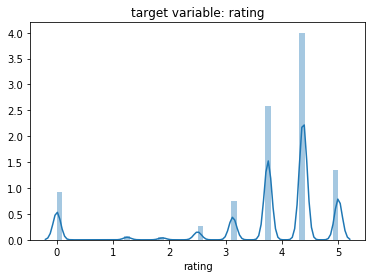

In [4]:
basic_info.data_info(raw_data, 'rating')

##### Create a new target variable for binary classification {1 if >= 2.5 else 0}

In [23]:
# drop nulls and create df with pertinant features
df = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)

#create new target variable for binary classification
#(raw_data['rating'] >= 2.5).as_integer_ratiotype(int)



In [26]:
target = target.sample(frac=0.3, replace=True, random_state=1)

##### Split the data

In [27]:
#quick check to see if any left over data is null
null_count = df.isnull().sum()
null_count[null_count>0]

Series([], dtype: int64)

In [28]:
#split
from sklearn.model_selection import train_test_split

X = df
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print(X_train.shape)
print(X_test.shape)

(4812, 674)
(1204, 674)


In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
svc = SVC(gamma='scale')

cross_val_score(svc, X_train, y_train, cv=10)

array([0.89419087, 0.90871369, 0.90248963, 0.90644491, 0.91060291,
       0.9022869 , 0.90852391, 0.91060291, 0.9043659 , 0.89791667])

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
svc.fit(X_train, y_train.values.ravel())

y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))

confusion = confusion_matrix(y_pred=y_pred, y_true=y_test)
print('')
print(confusion)

              precision    recall  f1-score   support

           0       0.86      0.19      0.31       132
           1       0.91      1.00      0.95      1072

    accuracy                           0.91      1204
   macro avg       0.89      0.59      0.63      1204
weighted avg       0.90      0.91      0.88      1204


[[  25  107]
 [   4 1068]]


##### Random Forest

In [36]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
rfc = ensemble.RandomForestClassifier(n_estimators=100)

cross_val_score(rfc, X_train, y_train, cv=10)

array([0.92323651, 0.92946058, 0.93360996, 0.93139293, 0.93970894,
       0.93347193, 0.91891892, 0.92723493, 0.92515593, 0.90416667])

In [38]:
rfc.fit(X_train, y_train.values.ravel())

y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

confusion = confusion_matrix(y_pred=y_pred, y_true=y_test)
print('')
print(confusion)

              precision    recall  f1-score   support

           0       0.72      0.36      0.48       132
           1       0.93      0.98      0.95      1072

    accuracy                           0.91      1204
   macro avg       0.82      0.67      0.72      1204
weighted avg       0.90      0.91      0.90      1204


[[  47   85]
 [  18 1054]]


##### Discussion

It looks like the model is doing good predicting scores above 2.5 but does bad anything below that. I ran random forest on the data and it appears to do a little better classifying the reviews below the split. One thing that can be done is to split the data even further.